# Baseline Model Notebook
This notebook runs a naïve forecast and an ARIMA(0,1,0) random-walk baseline on the close price.

In [ ]:
import os, sys
import importlib.util

module_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src', 'models', '1_baseline.py'))
spec = importlib.util.spec_from_file_location('baseline', module_path)
baseline_mod = importlib.util.module_from_spec(spec)
spec.loader.exec_module(baseline_mod)

# run the baseline and unpack
metrics, y_true, y_naive, y_rw, model = baseline_mod.run_baseline()
print(metrics)


/Users/mchildress/Active Code/ts_basics/Modeling/src/data_loader.py:24: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df = df.asfreq('T')
/Users/mchildress/Active Code/ts_basics/Modeling/src/data_loader.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


{'mae_naive': 220.29132586493358, 'rmse_naive': 270.09165325732835, 'mae_rw': 220.29132586493358, 'rmse_rw': 270.09165325732835, 'aic_rw': 1738269.491810181, 'bic_rw': 1738282.3880456649}


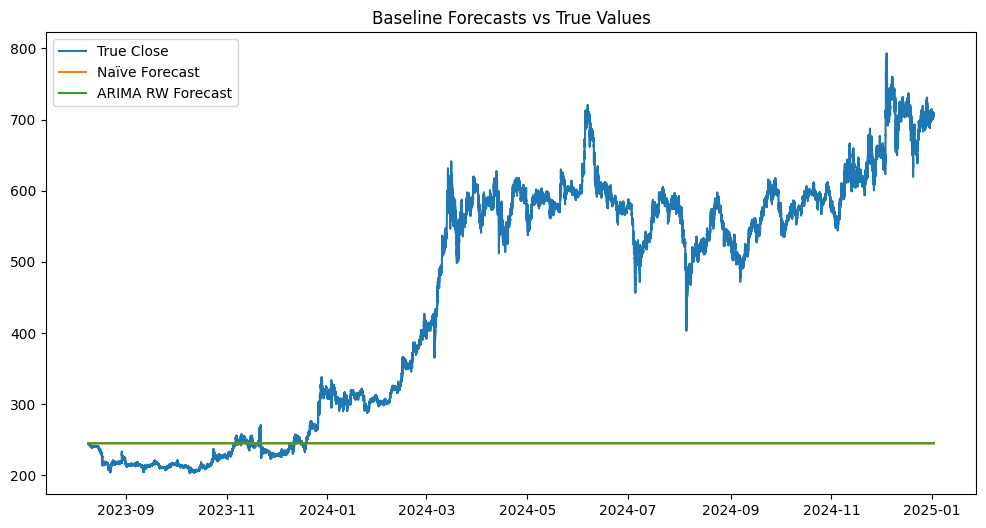

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(y_true.index, y_true, label='True Close')
plt.plot(y_true.index, y_naive, label='Naïve Forecast')
plt.plot(y_true.index, y_rw, label='ARIMA RW Forecast')
plt.legend()
plt.title('Baseline Forecasts vs True Values')
plt.show()